In [3]:
import sys
from itertools import combinations
from math import sin
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from tqdm import tqdm

sys.path.append("../code/")

import xgi
from hypersync_draw import *
from hypersync_generate import *
from hypersync_identify import *
from hypersync_integrate import *

sb.set_theme(style="ticks", context="paper")

results_dir = "../results/"
data_dir = "../data/"

Path(results_dir).mkdir(parents=True, exist_ok=True)
Path(data_dir).mkdir(parents=True, exist_ok=True)

In [4]:
from math import cos, pi, sin, exp

## Yuanzhao's

In [5]:
from math import cos, sin
from numba import jit

In [18]:
# Directed hypergraphs
@jit 
def lambda2(N, K1, K2, q, r):
    a2 = K1 * cos(2 * np.pi * q / N) / r
    a3 = K1 * cos(4 * np.pi * q / N) / r
    a1 = -2 * (a2 + a3)

    #b2 = K2 * (1 + cos(2 * np.pi * q / N) + cos(6 * np.pi * q / N)) / (r * (2 * r - 1))
    #b3 = K2 * (1 + cos(2 * np.pi * q / N) + cos(6 * np.pi * q / N)) / (r * (2 * r - 1))
    #b2 = K2 * (1 + cos(6 * np.pi * q / N) + cos(8 * np.pi * q / N)) / (r * (2 * r - 1))
    #b3 = K2 * (cos(6 * np.pi * q / N) + cos(10 * np.pi * q / N) + cos(12 * np.pi * q / N)) / (r * (2 * r - 1))
    b2 = K2 * (1 + cos(10 * np.pi * q / N) + 2 * cos(6 * np.pi * q / N)) / (r * (2 * r - 1))
    b3 = K2 * (1 + cos(12 * np.pi * q / N) + cos(8 * np.pi * q / N)) / (r * (2 * r - 1))
    b1 = -2 * (b2 + b3)

    A1 = a1 + b1
    A2 = a2 + b2
    A3 = a3 + b3

    Lambda = np.zeros(N, dtype=np.complex_)
    for i in range(N):
        Lambda[i] = (
            A1
            + A2 * np.exp(2j * np.pi * i / N)
            + A3 * np.exp(2j * np.pi * i * 2 / N)
            + A2 * np.exp(2j * np.pi * i * (N - 1) / N)
            + A3 * np.exp(2j * np.pi * i * (N - 2) / N)
        )

    Lambda = np.real(Lambda)
    lambda_2 = np.sort(Lambda[1:])[-1]

    return lambda_2

/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/labellines/core.py:148: UserWarning: Tried to label line Line2D(_child5), but could not find a label for it.
  warnings.warn(


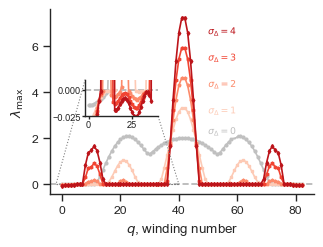

In [19]:
m = 5
N = 83
r = 2
r1 = 1
r2 = range(m)
Lambda_2 = np.zeros((N, m), dtype=np.complex_)

for q in range(N):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N, r1, r2[j], q, r)

fig, ax = plt.subplots(figsize=(3.4, 2.4))

ax.set_xlabel(r"$q$, winding number")
ax.set_ylabel(r"$\lambda_\mathrm{max}$")

markers = ["o", "s", "p", "h", "d"]
labels = [
    r"$\sigma_\Delta=0$",
    r"$\sigma_\Delta=1$",
    r"$\sigma_\Delta=2$",
    r"$\sigma_\Delta=3$",
    r"$\sigma_\Delta=4$",
]

colors = ["silver"] + sb.color_palette("Reds", n_colors=len(labels) - 1)

for i in range(m):
    ax.plot(
        Lambda_2.real[:, i],
        linestyle="-",
        # linewidth=3,
        marker=markers[i],
        ms=2,
        color=colors[i],
        # alpha=0.6,
        label=labels[i],
    )

ax.axhline(0, linestyle="--", alpha=0.6, c="grey", zorder=-2)


from labellines import labelLine, labelLines

legs = labelLines(
    ax.get_lines(),
    zorder=2.5,
    xvals=[40] * 5,
    yoffsets=[0.3] + [0.05] * 5,
    fontsize="x-small",
    align=False,
)
x_offset = 15
for leg in legs:
    x, y = leg.get_position()
    leg.set_position((x + x_offset, y))
    
    
    

# insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

axins1 = inset_axes(
    ax,
    width="100%", height="100%",
    bbox_to_anchor=(10, 3.2, 25, 1.6),
    bbox_transform=ax.transData,
)

for i in range(m):
    axins1.plot(
        Lambda_2.real[:, i],
        linestyle="-",
        # linewidth=3,
        marker=markers[i],
        ms=2,
        color=colors[i],
        # alpha=0.6,
        label=labels[i],
    )
    
axins1.set_ylim([-0.025, 0.01])
axins1.set_xlim([-2, 40])
axins1.axhline(0, linestyle="--", alpha=0.6, c="grey", zorder=-2)

axins1.set_ylabel("")
plt.yticks(fontsize="x-small")
#axins1.set_xticks([])
plt.xticks(fontsize="x-small")
#plt.xlabel(fontsize="x-small", labelpad=3)
axins1.tick_params('both', length=2, which='major', pad=1)

mark_inset(ax, axins1, loc1=2, loc2=4, ec="grey", ls=":")



sb.despine()

# plt.savefig("lambda2.pdf")

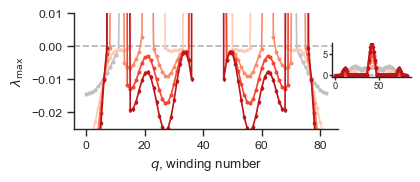

In [20]:
m = 5
N = 83
r = 2
r1 = 1
r2 = range(m)
Lambda_2 = np.zeros((N, m), dtype=np.complex_)

for q in range(N):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N, r1, r2[j], q, r)

fig, ax = plt.subplots(figsize=(3.4, 1.5))

ax.set_xlabel(r"$q$, winding number")
ax.set_ylabel(r"$\lambda_\mathrm{max}$")

markers = ["o", "s", "p", "h", "d"]
labels = [
    r"$\sigma_\Delta=0$",
    r"$\sigma_\Delta=1$",
    r"$\sigma_\Delta=2$",
    r"$\sigma_\Delta=3$",
    r"$\sigma_\Delta=4$",
]

colors = ["silver"] + sb.color_palette("Reds", n_colors=len(labels) - 1)

for i in range(m):
    ax.plot(
        Lambda_2.real[:, i],
        linestyle="-",
        # linewidth=3,
        marker=markers[i],
        ms=2,
        color=colors[i],
        # alpha=0.6,
        label=labels[i],
    )

ax.axhline(0, linestyle="--", alpha=0.6, c="grey", zorder=-2)


from labellines import labelLine, labelLines

legs = labelLines(
    ax.get_lines(),
    zorder=2.5,
    xvals=[40] * 5,
    yoffsets=[0.3] + [0.05] * 5,
    fontsize="x-small",
    align=False,
)
x_offset = 15
for leg in legs:
    x, y = leg.get_position()
    leg.set_position((x + x_offset, y))
    
    
    

# insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

axins1 = inset_axes(
    ax,
    width="100%", height="100%",
    bbox_to_anchor=(1, 0.5, 0.3, 0.3),
    bbox_transform=ax.transAxes,
)

for i in range(m):
    axins1.plot(
        Lambda_2.real[:, i],
        linestyle="-",
        # linewidth=3,
        marker=markers[i],
        ms=2,
        color=colors[i],
        # alpha=0.6,
        label=labels[i],
    )
    
#axins1.set_ylim([-0.025, 0.01])
#axins1.set_xlim(xmax=40)
axins1.axhline(0, linestyle="--", alpha=0.6, c="grey", zorder=-2)

axins1.set_ylabel("")
plt.yticks(fontsize="x-small")
#axins1.set_xticks([])
plt.xticks(fontsize="x-small")
#plt.xlabel(fontsize="x-small", labelpad=3)
axins1.tick_params('both', length=2, which='major', pad=1)

#mark_inset(ax, axins1, loc1=2, loc2=4, ec="0.5", ls=":")

ax.set_ylim([-0.025, 0.01])


sb.despine()

# plt.savefig("lambda2.pdf")

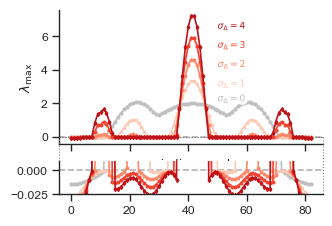

In [23]:
m = 5
N = 83
r = 2
r1 = 1
r2 = range(m)
Lambda_2 = np.zeros((N, m), dtype=np.complex_)

for q in range(N):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N, r1, r2[j], q, r)

fig, (ax, axins1) = plt.subplots(2, 1, figsize=(3.4, 2.4), height_ratios=[4, 1], sharex=True)

ax.set_xlabel(r"$q$, winding number")
ax.set_ylabel(r"$\lambda_\mathrm{max}$")

markers = ["o", "s", "p", "h", "d"]
labels = [
    r"$\sigma_\Delta=0$",
    r"$\sigma_\Delta=1$",
    r"$\sigma_\Delta=2$",
    r"$\sigma_\Delta=3$",
    r"$\sigma_\Delta=4$",
]

colors = ["silver"] + sb.color_palette("Reds", n_colors=len(labels) - 1)

for i in range(m):
    ax.plot(
        Lambda_2.real[:, i],
        linestyle="-",
        # linewidth=3,
        marker=markers[i],
        ms=2,
        color=colors[i],
        # alpha=0.6,
        label=labels[i],
    )

ax.axhline(0, linestyle="--", alpha=0.6, c="grey", zorder=-2)


from labellines import labelLine, labelLines

legs = labelLines(
    ax.get_lines(),
    zorder=2.5,
    xvals=[40] * 5,
    yoffsets=[0.3] + [0.05] * 5,
    fontsize="x-small",
    align=False,
)
x_offset = 15
for leg in legs:
    x, y = leg.get_position()
    leg.set_position((x + x_offset, y))
    


for i in range(m):
    axins1.plot(
        Lambda_2.real[:, i],
        linestyle="-",
        # linewidth=3,
        marker=markers[i],
        ms=2,
        color=colors[i],
        # alpha=0.6,
        label=labels[i],
    )
    
axins1.set_ylim(ymax=0.01, ymin=-0.025)
#axins1.set_xlim([-2, 40])
axins1.axhline(0, linestyle="--", alpha=0.6, c="grey", zorder=-2)

axins1.set_ylabel("")
#plt.yticks(fontsize="x-small")
#axins1.set_xticks([])
#plt.xticks(fontsize="x-small")
#plt.xlabel(fontsize="x-small", labelpad=3)
#axins1.tick_params('both', length=2, which='major', pad=1)

mark_inset(ax, axins1, loc1=2, loc2=4, ec="0.5", ls=":")

sb.despine()

# plt.savefig("lambda2.pdf")

In [24]:
m = 50
N1 = 83
N2 = 830
r = 2
k1 = 1
k2 = np.linspace(0, 10, num=m)

Lambda_2 = np.zeros((N1, m), dtype=np.complex_)
for q in range(N1):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N1, k1, k2[j], q, r)
stable_fraction1 = np.mean(Lambda_2 < 0, axis=0)

Lambda_2 = np.zeros((N2, m), dtype=np.complex_)
for q in range(N2):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N2, k1, k2[j], q, r)
stable_fraction2 = np.mean(Lambda_2 < 0, axis=0)


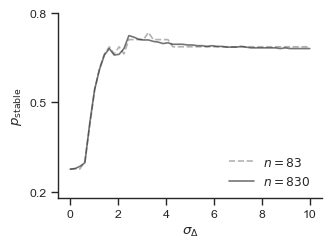

In [25]:


fig, ax = plt.subplots(figsize=(3.4, 2.4))

ax.set_xlabel(r"$\sigma_\Delta$")
ax.set_ylabel(r"$p_\mathrm{stable}$")


ax.plot(
    k2,
    stable_fraction1,
    linestyle="--",
    color="grey",
    alpha=0.6,
    label=r"$n=83$",
)
ax.plot(
    k2,
    stable_fraction2,
    linestyle="-",
    color="k",
    alpha=0.6,
    label=r"$n=830$",
)

#ax.set_xticks([0, 2, 4])
ax.set_yticks([0.2, 0.5, 0.8])
ax.set_ylim(ymin=0.18)


ax.legend(loc="lower right", frameon=False, ncol=1)

sb.despine()


#plt.savefig("stable_fraction.pdf")

## all together

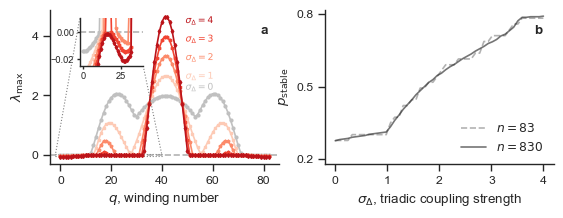

In [6]:
m = 5
N = 83
r = 2
r1 = 1
r2 = range(m)
Lambda_2 = np.zeros((N, m), dtype=np.complex_)

for q in range(N):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N, r1, r2[j], q, r)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(6.5, 2))

ax.set_xlabel(r"$q$, winding number")
ax.set_ylabel(r"$\lambda_\mathrm{max}$")

markers = ["o", "s", "p", "h", "d"]
labels = [
    r"$\sigma_\Delta=0$",
    r"$\sigma_\Delta=1$",
    r"$\sigma_\Delta=2$",
    r"$\sigma_\Delta=3$",
    r"$\sigma_\Delta=4$",
]

colors = ["silver"] + sb.color_palette("Reds", n_colors=len(labels) - 1)

for i in range(m):
    ax.plot(
        Lambda_2.real[:, i],
        linestyle="-",
        # linewidth=3,
        marker=markers[i],
        ms=2,
        color=colors[i],
        # alpha=0.6,
        label=labels[i],
    )

ax.axhline(0, linestyle="--", alpha=0.6, c="grey", zorder=-2)
ax.set_yticks([0, 2, 4])

from labellines import labelLine, labelLines

legs = labelLines(
    ax.get_lines(),
    zorder=2.5,
    xvals=[40] * 5,
    yoffsets=[0.3] + [0.05] * 5,
    fontsize="x-small",
    align=False,
)
x_offset = 15
for leg in legs:
    x, y = leg.get_position()
    leg.set_position((x + x_offset, y))
    
    
    

# insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

axins1 = inset_axes(
    ax,
    width="100%", height="100%",
    bbox_to_anchor=(10, 3.2, 25, 1.6),
    bbox_transform=ax.transData,
)

for i in range(m):
    axins1.plot(
        Lambda_2.real[:, i],
        linestyle="-",
        # linewidth=3,
        marker=markers[i],
        ms=2,
        color=colors[i],
        # alpha=0.6,
        label=labels[i],
    )
    
axins1.set_ylim([-0.025, 0.01])
axins1.set_xlim([-2, 40])
axins1.axhline(0, linestyle="--", alpha=0.6, c="grey", zorder=-2)

axins1.set_ylabel("")
plt.yticks([0, -0.02], fontsize="x-small")
#axins1.set_xticks([])
plt.xticks(fontsize="x-small")
#plt.xlabel(fontsize="x-small", labelpad=3)
axins1.tick_params('both', length=2, which='major', pad=2)

mark_inset(ax, axins1, loc1=2, loc2=4, ec="0.5", ls=":")



sb.despine()

#######
# other one
##########

m = 50
N1 = 83
N2 = 830
r = 2
r1 = 1
r2 = np.linspace(0, 4, num=m)

Lambda_2 = np.zeros((N1, m), dtype=np.complex_)
for q in range(N1):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N1, r1, r2[j], q, r)
stable_fraction1 = np.mean(Lambda_2 < 0, axis=0)

Lambda_2 = np.zeros((N2, m), dtype=np.complex_)
for q in range(N2):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N2, r1, r2[j], q, r)
stable_fraction2 = np.mean(Lambda_2 < 0, axis=0)


ax2.set_xlabel(r"$\sigma_\Delta$, triadic coupling strength")
ax2.set_ylabel(r"$p_\mathrm{stable}$")


ax2.plot(
    r2,
    stable_fraction1,
    linestyle="--",
    color="grey",
    alpha=0.6,
    label=r"$n=83$",
)
ax2.plot(
    r2,
    stable_fraction2,
    linestyle="-",
    color="k",
    alpha=0.6,
    label=r"$n=830$",
)

#ax.set_xticks([0, 2, 4])
ax2.set_yticks([0.2, 0.5, 0.8])
ax2.set_ylim(ymin=0.18)


ax2.legend(loc="lower right", frameon=False, ncol=1)

ax.text(0.95, 0.9, "a", transform=ax.transAxes, weight="bold", va="top", ha="right")
ax2.text(0.95, 0.9, "b", transform=ax2.transAxes, weight="bold", va="top", ha="right")

sb.despine()


plt.savefig("../results/figure_1.pdf", dpi=250, bbox_inches="tight", pad_inches=0)

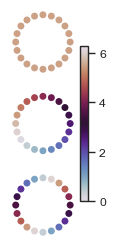

In [53]:
fig, axs = plt.subplots(3, 1, figsize=(1, 3))

N = 20

for q in range(3):
    #cbar=True if q==2 else False
    psi = generate_q_twisted_state(N, q)
    H = xgi.trivial_hypergraph(N)
    _, im = plot_phases_ring(H, psi[:, None], ax=axs[q], colorbar=False, node_size=5)
    
#plt.colorbar(im)
fig.colorbar(im, ax=axs, shrink=0.8, fraction=0.1)

In [ ]:
xgi.draw_nodes()

Text(1.2, 0.7, 'c')

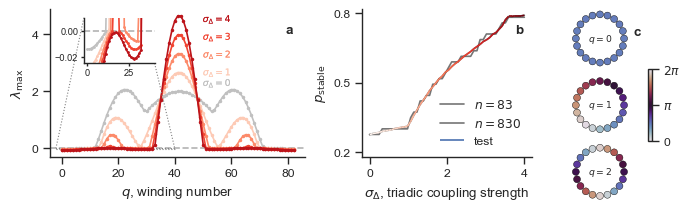

In [55]:
m = 5
N = 83
r = 2
r1 = 1
r2 = range(m)
Lambda_2 = np.zeros((N, m), dtype=np.complex_)

for q in range(N):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N, r1, r2[j], q, r)

fig = plt.figure(figsize=(6.8, 2), layout="constrained")

subfigs = fig.subfigures(1, 2, wspace=0.05, width_ratios=[4, 1])

(ax, ax2) = subfigs[0].subplots(1, 2, width_ratios=[1.5, 1])

axs1 = subfigs[1].subplots(3, 1)


ax.set_xlabel(r"$q$, winding number")
ax.set_ylabel(r"$\lambda_\mathrm{max}$")

markers = ["o", "s", "p", "h", "d"]
labels = [
    r"$\sigma_\Delta=0$",
    r"$\sigma_\Delta=1$",
    r"$\sigma_\Delta=2$",
    r"$\sigma_\Delta=3$",
    r"$\sigma_\Delta=4$",
]

colors = ["silver"] + sb.color_palette("Reds", n_colors=len(labels) - 1)

for i in range(m):
    ax.plot(
        Lambda_2.real[:, i],
        linestyle="-",
        # linewidth=3,
        marker="o", #markers[i],
        ms=1.5,
        #mfc="w",
        color=colors[i],
        # alpha=0.6,
        label=labels[i],
    )

ax.axhline(0, linestyle="--", alpha=0.6, c="grey", zorder=-2)
ax.set_yticks([0, 2, 4])

from labellines import labelLine, labelLines

legs = labelLines(
    ax.get_lines(),
    zorder=2.5,
    xvals=[40] * 5,
    yoffsets=[0.3] + [0.05] * 5,
    fontsize="x-small",
    align=False,
    outline_width=0
)
x_offset = 15
for leg in legs:
    x, y = leg.get_position()
    leg.set_position((x + x_offset, y))
    
    
    

# insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

axins1 = inset_axes(
    ax,
    width="100%", height="100%",
    bbox_to_anchor=(10, 3.2, 25, 1.6),
    bbox_transform=ax.transData,
)

for i in range(m):
    axins1.plot(
        Lambda_2.real[:, i],
        linestyle="-",
        # linewidth=3,
        marker="o", #markers[i],
        ms=1,
        color=colors[i],
        # alpha=0.6,
        label=labels[i],
    )
    
axins1.set_ylim([-0.025, 0.01])
axins1.set_xlim([-2, 40])
axins1.axhline(0, linestyle="--", alpha=0.6, c="grey", zorder=-2)

axins1.set_ylabel("")
plt.yticks([0, -0.02], fontsize="x-small")
#axins1.set_xticks([])
plt.xticks(fontsize="x-small")
#plt.xlabel(fontsize="x-small", labelpad=3)
axins1.tick_params('both', length=2, which='major', pad=2)

mark_inset(ax, axins1, loc1=2, loc2=4, ec="0.5", ls=":")



sb.despine()

#######
# other one
##########

m = 50
N1 = 83
N2 = 830
r = 2
r1 = 1
r2 = np.linspace(0, 4, num=m)

Lambda_2 = np.zeros((N1, m), dtype=np.complex_)
for q in range(N1):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N1, r1, r2[j], q, r)
stable_fraction1 = np.mean(Lambda_2 < 0, axis=0)

Lambda_2 = np.zeros((N2, m), dtype=np.complex_)
for q in range(N2):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N2, r1, r2[j], q, r)
stable_fraction2 = np.mean(Lambda_2 < 0, axis=0)


ax2.set_xlabel(r"$\sigma_\Delta$, triadic coupling strength")
ax2.set_ylabel(r"$p_\mathrm{stable}$")


ax2.plot(
    r2,
    stable_fraction1,
    linestyle="-",
    color="k",
    alpha=0.6,
    label=r"$n=83$",
)
ax2.plot(
    r2,
    stable_fraction2,
    linestyle="-",
    color="k",
    alpha=0.6,
    label=r"$n=830$",
)

# Create a colormap
cmap = plt.get_cmap('Reds')  # You can choose any colormap you like
x = r2
y = stable_fraction2
# Create segments for the colored line
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection with varying colors
norm = plt.Normalize(x.min(), x.max())
lc = LineCollection(segments, cmap=cmap, norm=norm, label="test")
lc.set_array(x)  # Assign colors based on the x values
ax2.add_collection(lc)


#ax.set_xticks([0, 2, 4])
ax2.set_yticks([0.2, 0.5, 0.8])
ax2.set_ylim(ymin=0.18)


ax2.legend(loc="lower right", frameon=False, ncol=1)

ax.text(0.95, 0.9, "a", transform=ax.transAxes, weight="bold", va="top", ha="right")
ax2.text(0.95, 0.9, "b", transform=ax2.transAxes, weight="bold", va="top", ha="right")

sb.despine()

## rings
########

N = 20

for q in range(3):
    #cbar=True if q==2 else False
    psi = generate_q_twisted_state(N, q)
    H = xgi.trivial_hypergraph(N)
    _, im = plot_phases_ring(H, psi[:, None], ax=axs1[q], colorbar=False, node_size=5, node_lw=0.3)
    
    axs1[q].text(0, 0, f"$q={q}$", fontsize="x-small", va="center", ha="center")
    
cbar = fig.colorbar(im, ax=axs1, shrink=0.6, fraction=0.05, pad=0.1)
cbar.set_ticks(ticks=[0, np.pi, 2*np.pi], labels=[0, r"$\pi$", r"$2\pi$"])

axs1[0].text(1.2, 0.7, "c", transform=axs1[0].transAxes, weight="bold", va="top", ha="right")


#plt.savefig("../results/figure_1_v2.pdf", dpi=250, bbox_inches="tight", pad_inches=0)

Text(0.02, 0.5, 'ylabel for subfigs[1]')

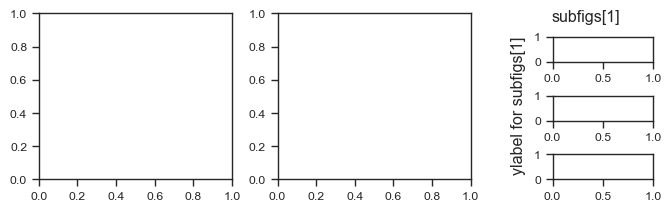

In [33]:
fig = plt.figure(layout="constrained", figsize=(6.6, 2))

subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[, 1])

(ax, ax2) = subfigs[0].subplots(1, 2)

axs1 = subfigs[1].subplots(3, 1)
subfigs[1].suptitle('subfigs[1]')
subfigs[1].supylabel('ylabel for subfigs[1]')

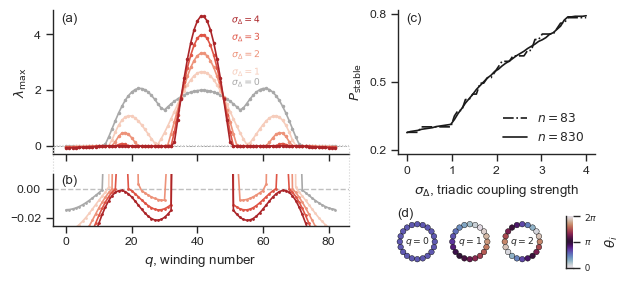

In [38]:
m = 5
N = 83
r = 2
r1 = 1
r2 = range(m)
Lambda_2 = np.zeros((N, m), dtype=np.complex_)

for q in range(N):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N, r1, r2[j], q, r)

fig, ([[ax, ax2], [axins1, ax1]]) = plt.subplots(
    2, 2, figsize=(7, 2.8), height_ratios=[2.8, 1], width_ratios=[1.5, 1], sharex=False
)

axins1.set_xlabel(r"$q$, winding number")
ax.set_ylabel(r"$\lambda_\mathrm{max}$")

markers = ["o", "s", "p", "h", "d"]
labels = [
    r"$\sigma_\Delta=0$",
    r"$\sigma_\Delta=1$",
    r"$\sigma_\Delta=2$",
    r"$\sigma_\Delta=3$",
    r"$\sigma_\Delta=4$",
]

colors = ["darkgrey"] + sb.color_palette("Reds", n_colors=len(labels) - 1, desat=0.8)

for i in range(m):
    ax.plot(
        Lambda_2.real[:, i],
        linestyle="-",
        # linewidth=3,
        marker="o", #"markers"[i],
        ms=1.5,
        color=colors[i],
        # alpha=0.6,
        label=labels[i],
    )

ax.axhline(0, linestyle="--", alpha=0.6, c="k", zorder=-2, lw=0.5)


from labellines import labelLine, labelLines

legs = labelLines(
    ax.get_lines(),
    zorder=2.5,
    xvals=[40] * 5,
    yoffsets=[0.3] + [0.05] * 5,
    fontsize="x-small",
    align=False,
)
x_offset = 15
for leg in legs:
    x, y = leg.get_position()
    leg.set_position((x + x_offset, y))


for i in range(m):
    axins1.plot(
        Lambda_2.real[:, i],
        linestyle="-",
        # linewidth=3,
        marker="o", #"markers"[i],
        ms=1,
        color=colors[i],
        # alpha=0.6,
        label=labels[i],
    )

axins1.set_ylim(ymax=0.01, ymin=-0.025)
# axins1.set_xlim([-2, 40])
axins1.axhline(0, linestyle="--", alpha=1, c="silver", zorder=-1, lw=1)

axins1.set_ylabel("")
# plt.yticks(fontsize="x-small")
# axins1.set_xticks([])
# plt.xticks(fontsize="x-small")
# plt.xlabel(fontsize="x-small", labelpad=3)
# axins1.tick_params('both', length=2, which='major', pad=1)

mark_inset(ax, axins1, loc1=2, loc2=4, ec="lightgrey", ls=":")


#######
# other one
##########

m = 50
N1 = 83
N2 = 830
r = 2
r1 = 1
r2 = np.linspace(0, 4, num=m)

Lambda_2 = np.zeros((N1, m), dtype=np.complex_)
for q in range(N1):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N1, r1, r2[j], q, r)
stable_fraction1 = np.mean(Lambda_2 < 0, axis=0)

Lambda_2 = np.zeros((N2, m), dtype=np.complex_)
for q in range(N2):
    for j in range(m):
        Lambda_2[q, j] = lambda2(N2, r1, r2[j], q, r)
stable_fraction2 = np.mean(Lambda_2 < 0, axis=0)


ax2.set_xlabel(r"$\sigma_\Delta$, triadic coupling strength")
ax2.set_ylabel(r"$P_\mathrm{stable}$")


ax2.plot(
    r2,
    stable_fraction1,
    linestyle="-.",
    color="k",
    #alpha=0.6,
    label=r"$n=83$",
)
ax2.plot(
    r2,
    stable_fraction2,
    linestyle="-",
    color="k",
    #alpha=0.6,
    label=r"$n=830$",
)

# ax.set_xticks([0, 2, 4])
ax2.set_yticks([0.2, 0.5, 0.8])
ax2.set_ylim(ymin=0.18)
axins1.set_yticks([0, -0.02])

ax.set_xticklabels([])

ax2.legend(loc="lower right", frameon=False, ncol=1)


## rings

N = 20

for q in range(3):
    # cbar=True if q==2 else False
    psi = generate_q_twisted_state(N, q)
    H = xgi.trivial_hypergraph(N)

    pos = xgi.circular_layout(H, center=[1 + 4.5 * q, 0], radius=1.5)
    psi = psi % (2 * np.pi)
    _, im = xgi.draw_nodes(
        H,
        pos=pos,
        ax=ax1,
        node_fc=psi,
        vmin=0,
        vmax=2 * np.pi,
        node_fc_cmap="twilight",
        node_size=4,
        node_lw=0.3
    )
    
    ax1.text(1 + 4.5 * q, 0, f"$q={q}$", fontsize="x-small", va="center", ha="center")

    # _, im = plot_phases_ring(H, psi[:, None], ax=ax, colorbar=False, node_size=5)


ax1.set_aspect("equal")

cbar = plt.colorbar(im, aspect=7, label=r"$\theta_i$")
cbar.set_ticks(ticks=[0, np.pi, 2*np.pi], labels=[0, r"$\pi$", r"$2\pi$"], fontsize="x-small")
cbar.outline.set_visible(False)

pos1 = ax1.get_position() # get the original position 
pos2 = [pos1.x0 - 0.01, pos1.y0 - 0.15,  pos1.width, pos1.height] 
ax1.set_position(pos2) # set a new position

cax = cbar.ax
pos1 = cax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0 - 0.15,  pos1.width, pos1.height] 
cax.set_position(pos2) # set a new position
#cbar.outline.set_linewidth(0.1)

ax.text(0.03, 0.98, "(a)", transform=ax.transAxes, weight="normal", va="top", ha="left")
axins1.text(0.03, 0.98, "(b)", transform=axins1.transAxes, weight="normal", va="top", ha="left")

ax2.text(0.04, 0.98, "(c)", transform=ax2.transAxes, weight="normal", va="top", ha="left")
ax1.text(0.04, 1.3, "(d)", transform=ax1.transAxes, weight="normal", va="top", ha="left")


sb.despine()

plt.savefig("../results/figure_1_v3.pdf", dpi=250, bbox_inches="tight", pad_inches=0)

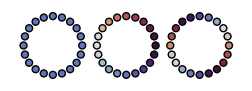

In [96]:
fig, ax = plt.subplots(figsize=(3, 1))

N = 20

for q in range(3):
    #cbar=True if q==2 else False
    psi = generate_q_twisted_state(N, q)
    H = xgi.trivial_hypergraph(N)
    
    pos = xgi.circular_layout(H, center=[2.5*q, 0])
    psi = psi % (2*np.pi)
    ax, im = xgi.draw_nodes(H, pos=pos, ax=ax, node_fc=psi, vmin=0, vmax=2*np.pi, node_fc_cmap="twilight", node_size=5)

    
    #_, im = plot_phases_ring(H, psi[:, None], ax=ax, colorbar=False, node_size=5)

    
ax.set_aspect("equal")

#plt.colorbar(im)
#fig.colorbar(im, ax=axs, shrink=0.8, fraction=0.1)

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
